In [1]:
#Data-set : https://www.kaggle.com/datasets/paultimothymooney/coronavirus-genome-sequence

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tabulate import tabulate

In [28]:
# open corona virus sequence data set and show to values(:1000) 

In [4]:
coronavirus = open(r'D:\SARS-Genome\Coronavirus Accession (SARS, MERS, COV2)\sars.fasta')
print('HEADER:',coronavirus.readline())
coronavirus = coronavirus.readlines()
COVID_seq = ''
for line in coronavirus:
    line = line.strip()
    COVID_seq += line
print(COVID_seq[0:1000])

HEADER: >NC_004718.3 SARS coronavirus, complete genome

ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAATTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGG

In [5]:
def basic_properties(DNAseq):
    total_base = len(DNAseq)
    num_Adenine = DNAseq.count('A')
    num_Guanine = DNAseq.count('G')
    num_Thymine = DNAseq.count('T')
    num_Cytosine = DNAseq.count('C')

    if total_base != num_Adenine + num_Guanine + num_Thymine + num_Cytosine:
        print('Error')
    else : pass
    
    A_percent = num_Adenine / total_base
    G_percent = num_Guanine / total_base
    T_percent = num_Thymine / total_base
    C_percent = num_Cytosine / total_base
    
    #visualization
    x = np.arange(4)
    bases = ['Adenine', 'Guanine', 'Thymine' ,'Cytosine']
    values = [num_Adenine, num_Guanine, num_Thymine, num_Cytosine]
    plt.bar(x,values)
    plt.xticks(x, bases)
    plt.show()
    table = [['total base',total_base,'Percentage',str('100%')],
             ['Adenine:',num_Adenine, 'Percentage:',str(round(A_percent*100,2))+'%'],
            ['Guanine:',num_Guanine, 'Percentage:',str(round(G_percent*100,2))+'%'],
             ['Thynime:',num_Thymine, 'Percentage:',str(round(T_percent*100,2))+'%'],
             ['Cytosine:',num_Cytosine, 'Percentage:',str(round(C_percent*100,2))+'%']]
    print(tabulate(table))
    print('GC content:', round((((num_Guanine + num_Cytosine) / total_base)*100),2),'%')

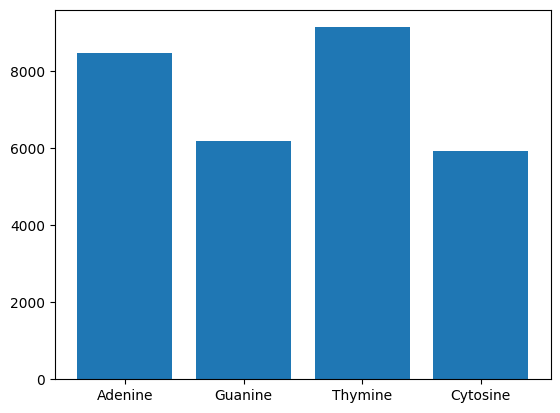

----------  -----  -----------  ------
total base  29751  Percentage   100%
Adenine:     8481  Percentage:  28.51%
Guanine:     6187  Percentage:  20.8%
Thynime:     9143  Percentage:  30.73%
Cytosine:    5940  Percentage:  19.97%
----------  -----  -----------  ------
GC content: 40.76 %


In [6]:
basic_properties(COVID_seq)

In [7]:
def transcription(DNAseq):
    mRNAseq = DNAseq.replace('T','U')
    print(len(mRNAseq))
    return mRNAseq
COVID_mRNA = transcription(COVID_seq)
COVID_mRNA[0:1000]

29751


'AUAUUAGGUUUUUACCUACCCAGGAAAAGCCAACCAACCUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUAGCUGUCGCUCGGCUGCAUGCCUAGUGCACCUACGCAGUAUAAACAAUAAUAAAUUUUACUGUCGUUGACAAGAAACGAGUAACUCGUCCCUCUUCUGCAGACUGCUUACGGUUUCGUCCGUGUUGCAGUCGAUCAUCAGCAUACCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUUCUUGGUGUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUCCUUCAGGUUAGAGACGUGCUAGUGCGUGGCUUCGGGGACUCUGUGGAAGAGGCCCUAUCGGAGGCACGUGAACACCUCAAAAAUGGCACUUGUGGUCUAGUAGAGCUGGAAAAAGGCGUACUGCCCCAGCUUGAACAGCCCUAUGUGUUCAUUAAACGUUCUGAUGCCUUAAGCACCAAUCACGGCCACAAGGUCGUUGAGCUGGUUGCAGAAAUGGACGGCAUUCAGUACGGUCGUAGCGGUAUAACACUGGGAGUACUCGUGCCACAUGUGGGCGAAACCCCAAUUGCAUACCGCAAUGUUCUUCUUCGUAAGAACGGUAAUAAGGGAGCCGGUGGUCAUAGCUAUGGCAUCGAUCUAAAGUCUUAUGACUUAGGUGACGAGCUUGGCACUGAUCCCAUUGAAGAUUAUGAACAAAACUGGAACACUAAGCAUGGCAGUGGUGCACUCCGUGAACUCACUCGUGAGCUCAAUGGAGGUGCAGUCACUCGCUAUGUCGACAACAAUUUCUGUGGCCCAGAUGGGUACCCUCUUGAUUGCAUCAAAGAUUUUCUCGCACGCGCGGGCAAGUCAAUGUGCACUCUUUCCGAACAACUUGAUUACAUCGAGUCGAAGAGAGGUGUCUACUGCUGCCGUGACCAUGAGCAUGAAAUUGCCUGGUUCACUGAGCGCUCU

In [8]:
def translate(seq):
    table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',}
    protein =""
    for i in range(0, len(seq), 3):
        codon = seq[i:i + 3]
        if codon in table:
            protein+= table[codon]
    return protein

protein_seq = translate(COVID_seq)
protein_seq[0:1000]

'ILGFYLPRKSQPTSISCRSVL_TNFKICVAVARLHA_CTYAV_TIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRV_PKGKMESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDD

In [9]:
def visualization(protein_seq):
    # composition of Amino Acids
    plt.figure(figsize=(35,50))
    x = np.arange(22)
    AA = ['Arginine', 'Histidie','Lysine',
          'Aspartic Acid','Glutamic Acid',
          'Serine','Threonine','Asparagine','Glutamine',
          'Cysteine','Selenocysteine','Glycine','Prolien',
          'Alanine','Valine','Isoleucine','Leucine',
          'Methionine','Phenylalanine','Tyrosine','Tryptophan',
          'Stop Codon']
    values = [protein_seq.count('R'),protein_seq.count('H'),protein_seq.count('K'),
              protein_seq.count('D'),protein_seq.count('E'),
              protein_seq.count('S'),protein_seq.count('T'),protein_seq.count('N'),protein_seq.count('Q'),
              protein_seq.count('C'),protein_seq.count('U'),protein_seq.count('G'),protein_seq.count('P'),
              protein_seq.count('A'),protein_seq.count('V'),protein_seq.count('I'),protein_seq.count('L'),
              protein_seq.count('M'),protein_seq.count('F'),protein_seq.count('Y'),protein_seq.count('W'),
              protein_seq.count('_')]
    plt.subplot(2,2,1)
    plt.rc('font',size = 20)
    plt.barh(AA,values,height=0.6)
    plt.title('AA in general')
    
    # visualization by groups as shown in figure
    x = np.arange(4)
    Electric =  protein_seq.count('R')+protein_seq.count('H')+protein_seq.count('K')+protein_seq.count('D')+protein_seq.count('E')
    Uncharged = protein_seq.count('S')+protein_seq.count('T')+protein_seq.count('N')+protein_seq.count('Q')
    Special =   protein_seq.count('C')+protein_seq.count('U')+protein_seq.count('G')+protein_seq.count('P')
    Hydrophobic = protein_seq.count('A')+protein_seq.count('V')+protein_seq.count('I')+protein_seq.count('L')+protein_seq.count('M')+protein_seq.count('F')+protein_seq.count('Y')+protein_seq.count('W')
    
    plt.subplot(2,2,2)
    types = ['Elecrically charged','Polar uncharged',
             'Special case', 'Hydrophobic Side Chain']
    values = [Electric,Uncharged,Special,Hydrophobic]
    plt.barh(types, values, height = 0.6)
    plt.title('AA in groups')
    
    # Visualization of positive and negative amino acid in Hydrophobic side chain group
    plt.subplot(2,2,3)
    x = np.arange(2)
    positive = protein_seq.count('R')+protein_seq.count('H')+protein_seq.count('K')
    negative = protein_seq.count('D')+protein_seq.count('E')
    types = ['Positive','Negative']
    values = [positive, negative]
    plt.barh(types,values, height=0.6)
    plt.title('Charge diff in Electrically charged side chain')
    #plt.show()
    
    # Visualization abundance of Amino Acid by relative frequenceies of amino aicd residue in secondary structure
    alpha_helix = protein_seq.count('A')+protein_seq.count('C')+protein_seq.count('L')+protein_seq.count('M')+protein_seq.count('E')+protein_seq.count('Q')+protein_seq.count('H')+protein_seq.count('K')
    beta_sheet =protein_seq.count('V')+protein_seq.count('I')+protein_seq.count('F')+protein_seq.count('Y')+protein_seq.count('W')+protein_seq.count('T')
    turn = protein_seq.count('G')+protein_seq.count('S')+protein_seq.count('D')+protein_seq.count('N')+protein_seq.count('P')
    x = np.arange(3)
    plt.subplot(2,2,4)
    types = ['Alpha helix','beta sheet','Turn']
    values = [alpha_helix, beta_sheet, turn]
    plt.barh(types,values, height=0.6)
    plt.title('AA residues in secondary structure')
    plt.show()

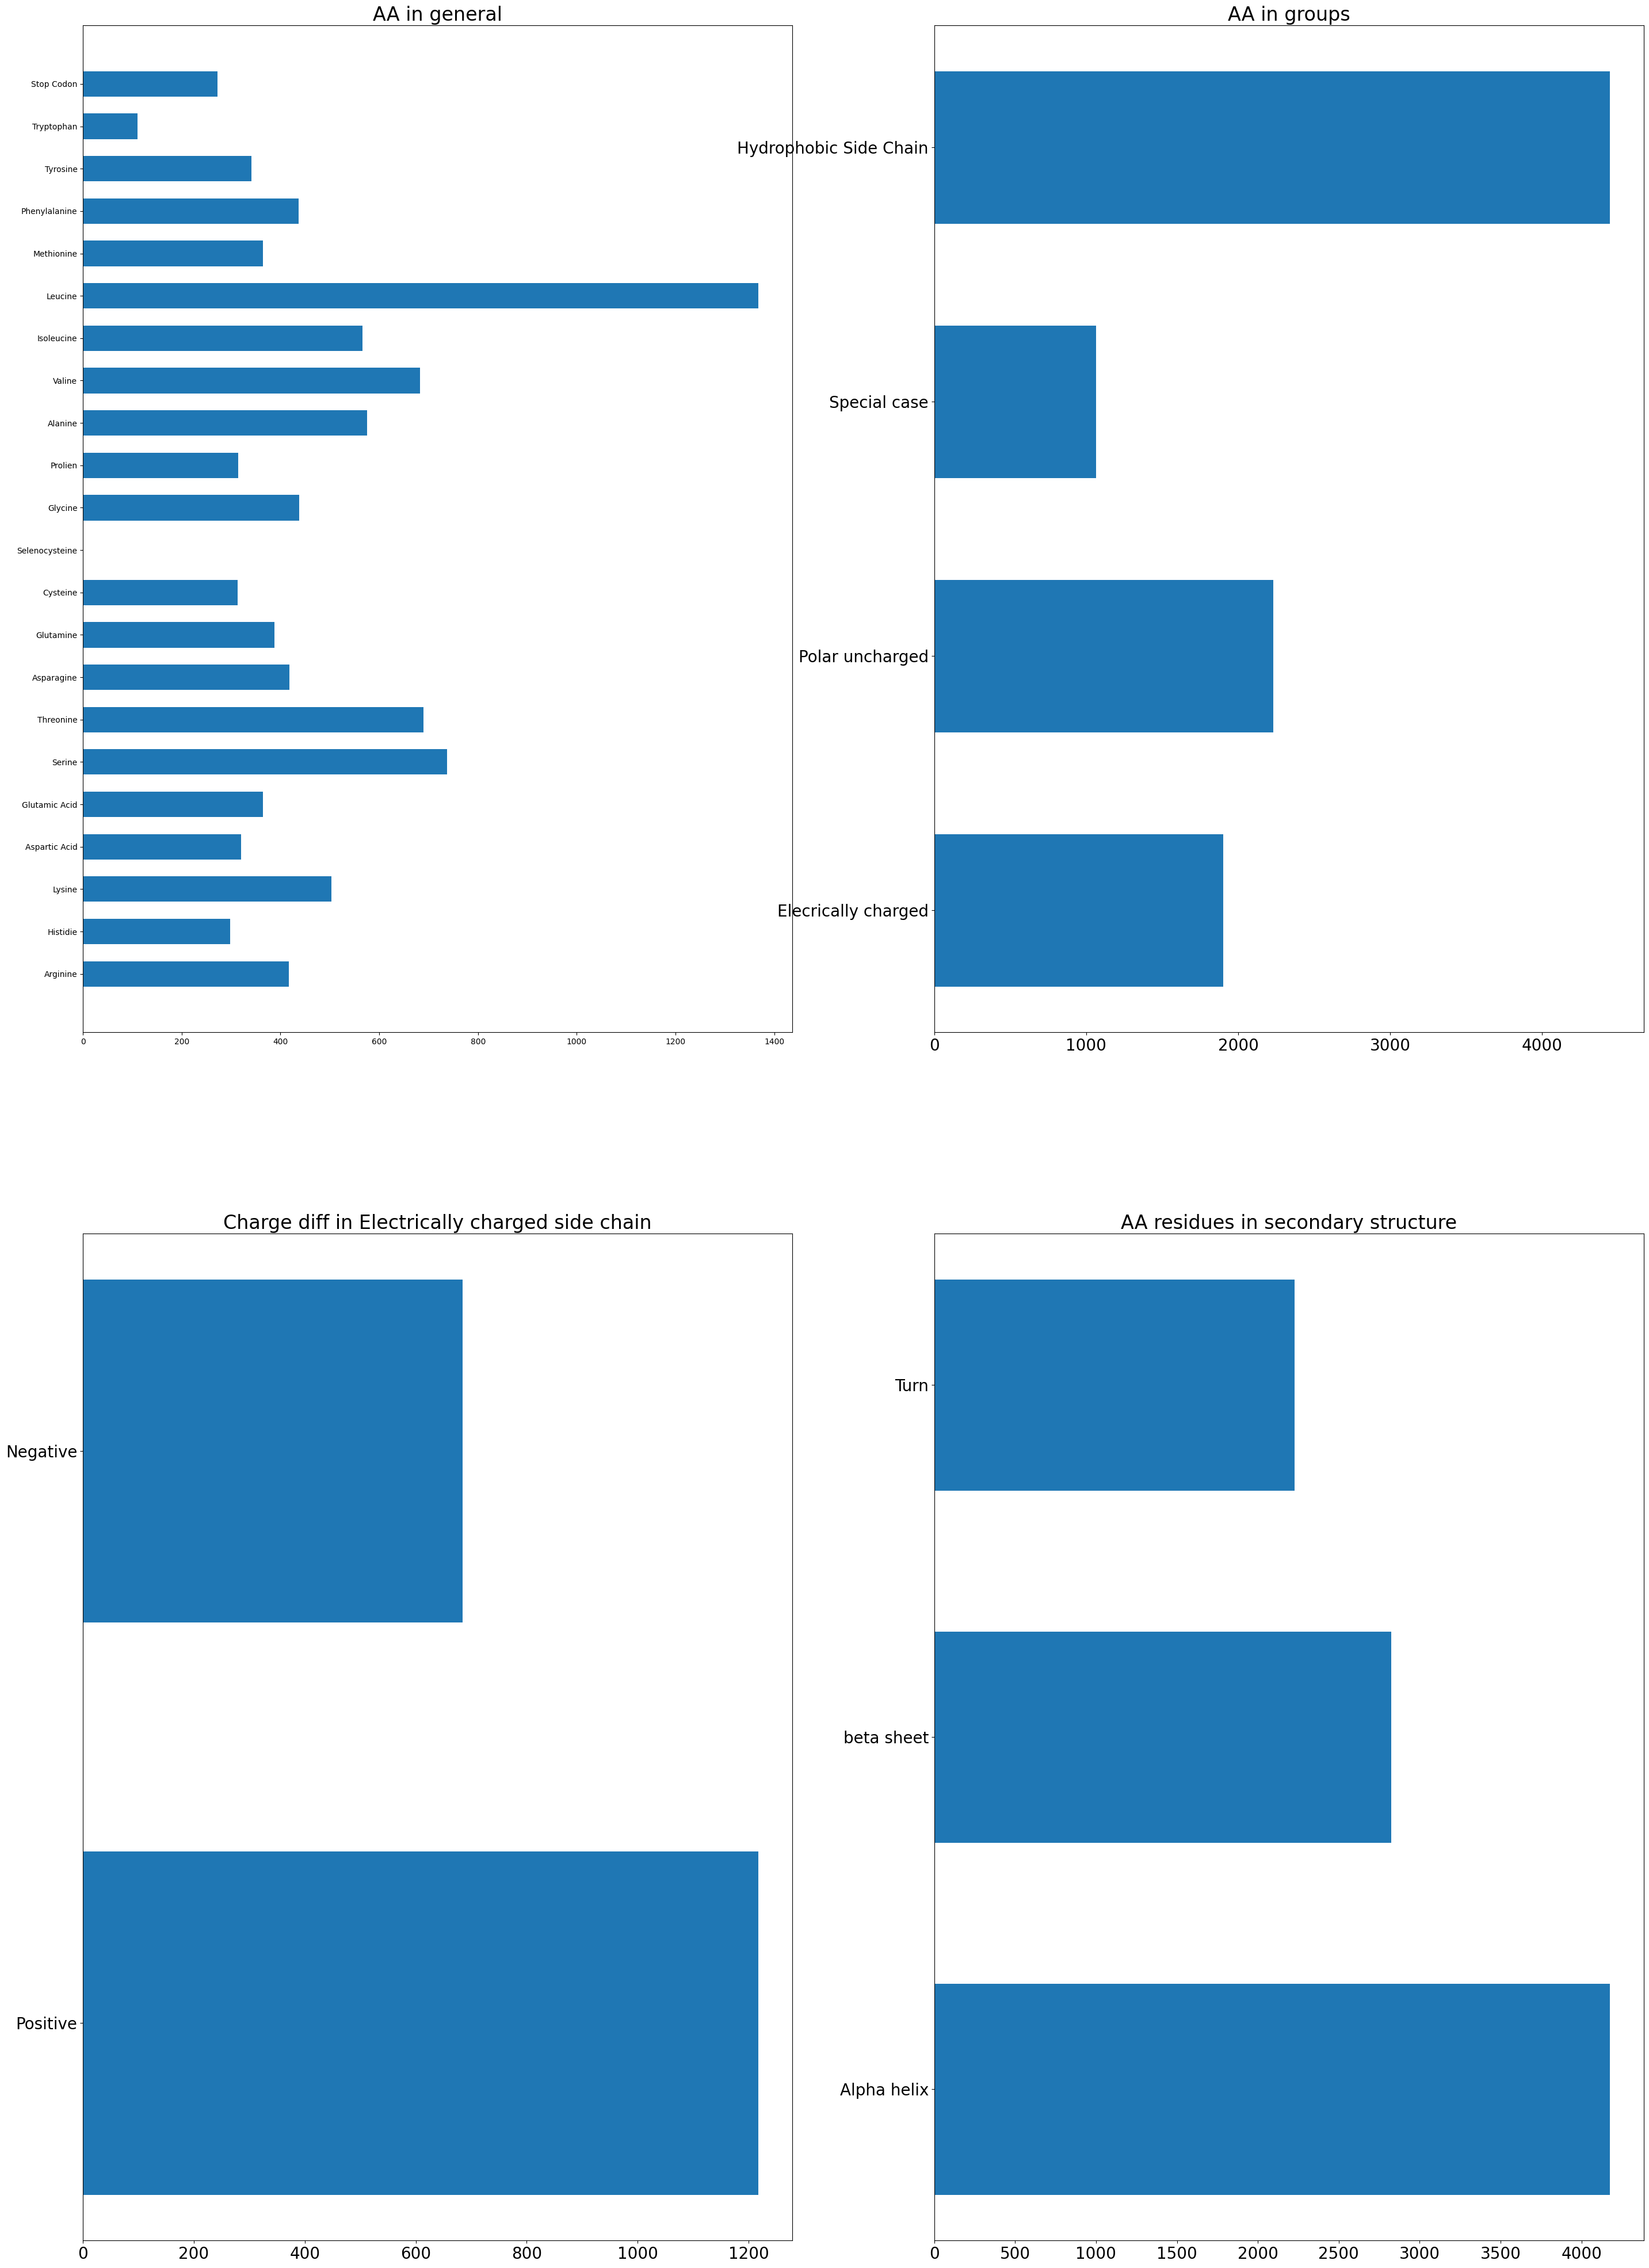

In [10]:
visualization(protein_seq)

In [11]:
def proteinseq_splic(protein_sequence):
    protein_group = protein_sequence.split('_')
    return protein_group
protein_list = proteinseq_splic(protein_seq)
print(proteinseq_splic(protein_seq)[0:100])
print('Number of proteins:',len(protein_list))

['ILGFYLPRKSQPTSISCRSVL', 'TNFKICVAVARLHA', 'CTYAV', 'TIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRV', 'PKGKMESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDL

In [12]:
def Functional_protein(protein_list):
    funct_group = []
    for protein in protein_list:
        if len(protein) > 20:
            funct_group.append(protein)
    return funct_group
function_protein = Functional_protein(protein_list)
print(function_protein[0:30])
print('Number of Functional proteins:',len(function_protein))

['ILGFYLPRKSQPTSISCRSVL', 'TIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRV', 'PKGKMESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSF

In [13]:
dna_ORF = []

def rf(seq):
    #getting all reading frames
    i=0
    while i+2<len(seq):
        if seq[i:i+3]=='ATG':
            j=i+3
            while j+2<len(seq):
                if seq[j:j+3] in ['TGA', 'TAA', 'TAG']:
                    dna_ORF.append(seq[i:j+3])
                j=j+3
        i=i+3
    return dna_ORF

def RC(seq):
    #reverse compliment
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    bases = list(seq) 
    bases = reversed([complement.get(base,base) for base in bases])
    bases = ''.join(bases)
    return bases
   
def ORF(seq):
    #open reading frame
    #num=0
    seqRC=RC(seq)
    for i in [0,1,2]:
        rf(seq[i:])
        rf(seqRC[i:])
        

In [14]:
RC(COVID_seq)[0:1000]

'TTTTTTTTTTTTTTTTTTTTTTTTGTCATTCTCCTAAGAAGCTATTAAAATCACATGGGGATAGCACTACTAAAATTAATTTTACACATTAGGGCTCTTCCATATAGGCAGCTCTCCCTAGCATTATTCACTGTACCCTCGATCGTACTCCGCGTGGCCTCGATGAAAATGTGGTGGCTCTTTCAAGTCCTCCCTAATGTTACACATTGATTAAAGATTGCTATGTGAGATTAAAGTTAACTAAACCTACTTGTGCTGTTTAGTTACGAGAATTCATTCTGCACAAGAGTAGACTATGTATCGTAAACGGAATTGCGAAAACGTTTACATAGCCCATCTGCCTTGTGTGGTCATCATGAGTGTTTATGCCTGAGTTGAATCAGCAGAAGCTCCACTCATGGAATTTTGAAGTTGTCTGGAGAAATCATCCATGTCAGCCGCAGGAAGAAGAGTCACAGTGGGCTGCTTCTTTTGTCTCTGCGGCAAAGGCTGAGCTTCATCAGTCTTTTTCTTTTTGTCCTTTTTAGGCTCTGTTGGTGGGAATGTTTTGTATGCGTCAATGTGCTTGTTCAGCAGTATGACGTTGTCTTTGAATTGTGGATCTTTGTCATCCAATTTAATGGCTCCATGATAAGTCAGCCATGTTCCCGAAGGTGTGACTTCCATGCCAATGCGTGACATTCCAAAGAATGCAGAGGCACTTGGAGCAAATTGTGCAATTTGCGGCCAATGTTTGTAATCAGTTCCTTGTCTGATTAGGTCTTGGTCCCCGAAATTTCCTTGGGTTTGTTCTGGACCACGTCTCCCAAATGCTTGAGTGACGTTGTACTGTTTTGTGGCAGTACGTTTTTGGCGAGGCTTTTTAGATGCCTCAGCAGCAGATTTCTTAGTGACAGTTTGGCCTTGTTGTTGTTGGCCTTTACCAGAAACTTTGCTCTCAAGCTGGTTCAATCTGTCTAGCAGCAATAGCGCGAGGGCAGTTTCACCACCTCCGCTAGC

In [15]:
ORF(COVID_seq)
print(dna_ORF[0:10])
print(len(dna_ORF))

['ATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGGTGTCTACTGCTGCCGTGACCATGAGCATGAAATTGCCTGGTTCACTGAGCGCTCTGATAAGAGCTACGAGCACCAGACACCCTTCGAAATTAAGAGTGCCAAGAAATTTGACACTTTCAAAGGGGAATGCCCAAAGTTTGTGTTTCCTCTTAACTCAAAAGTCAAAGTCATTCAACCACGTGTTGAAAAGAAAAAGACTGAGGGTTTCATGGGGCGTATACGCTCTGTGTACCCTGTTGCATCTCCACAGGAGTGTAACAATATGCACTTGTCTACCTTGATGAAATGTAATCATTGCGATGAAGTTTCATGGCAGAC

In [16]:
# converting dnaORF to proteinORF
candidate_pro_ORF = []
def dna_pro_ORF(dnaORF):
    for ORF in dnaORF:
        candidate_pro_ORF.append(translate(ORF))
    return candidate_pro_ORF
print(dna_pro_ORF(dna_ORF)[0:10])

['MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPT

In [17]:
valid_group = []
def valid_ORF(protein_seq):
    for protein in protein_seq:
        if protein.count('_') == 1:
            valid_group.append(protein)
    return valid_group
valid_ORF(candidate_pro_ORF)
print(valid_group[0:10])
len(valid_group)  

['MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPT

1328

In [18]:
functional_ORF = Functional_protein(valid_group)
print(functional_ORF[0:20])
print('number of functional protein:',len(functional_ORF))

['MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPT

MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPTPE

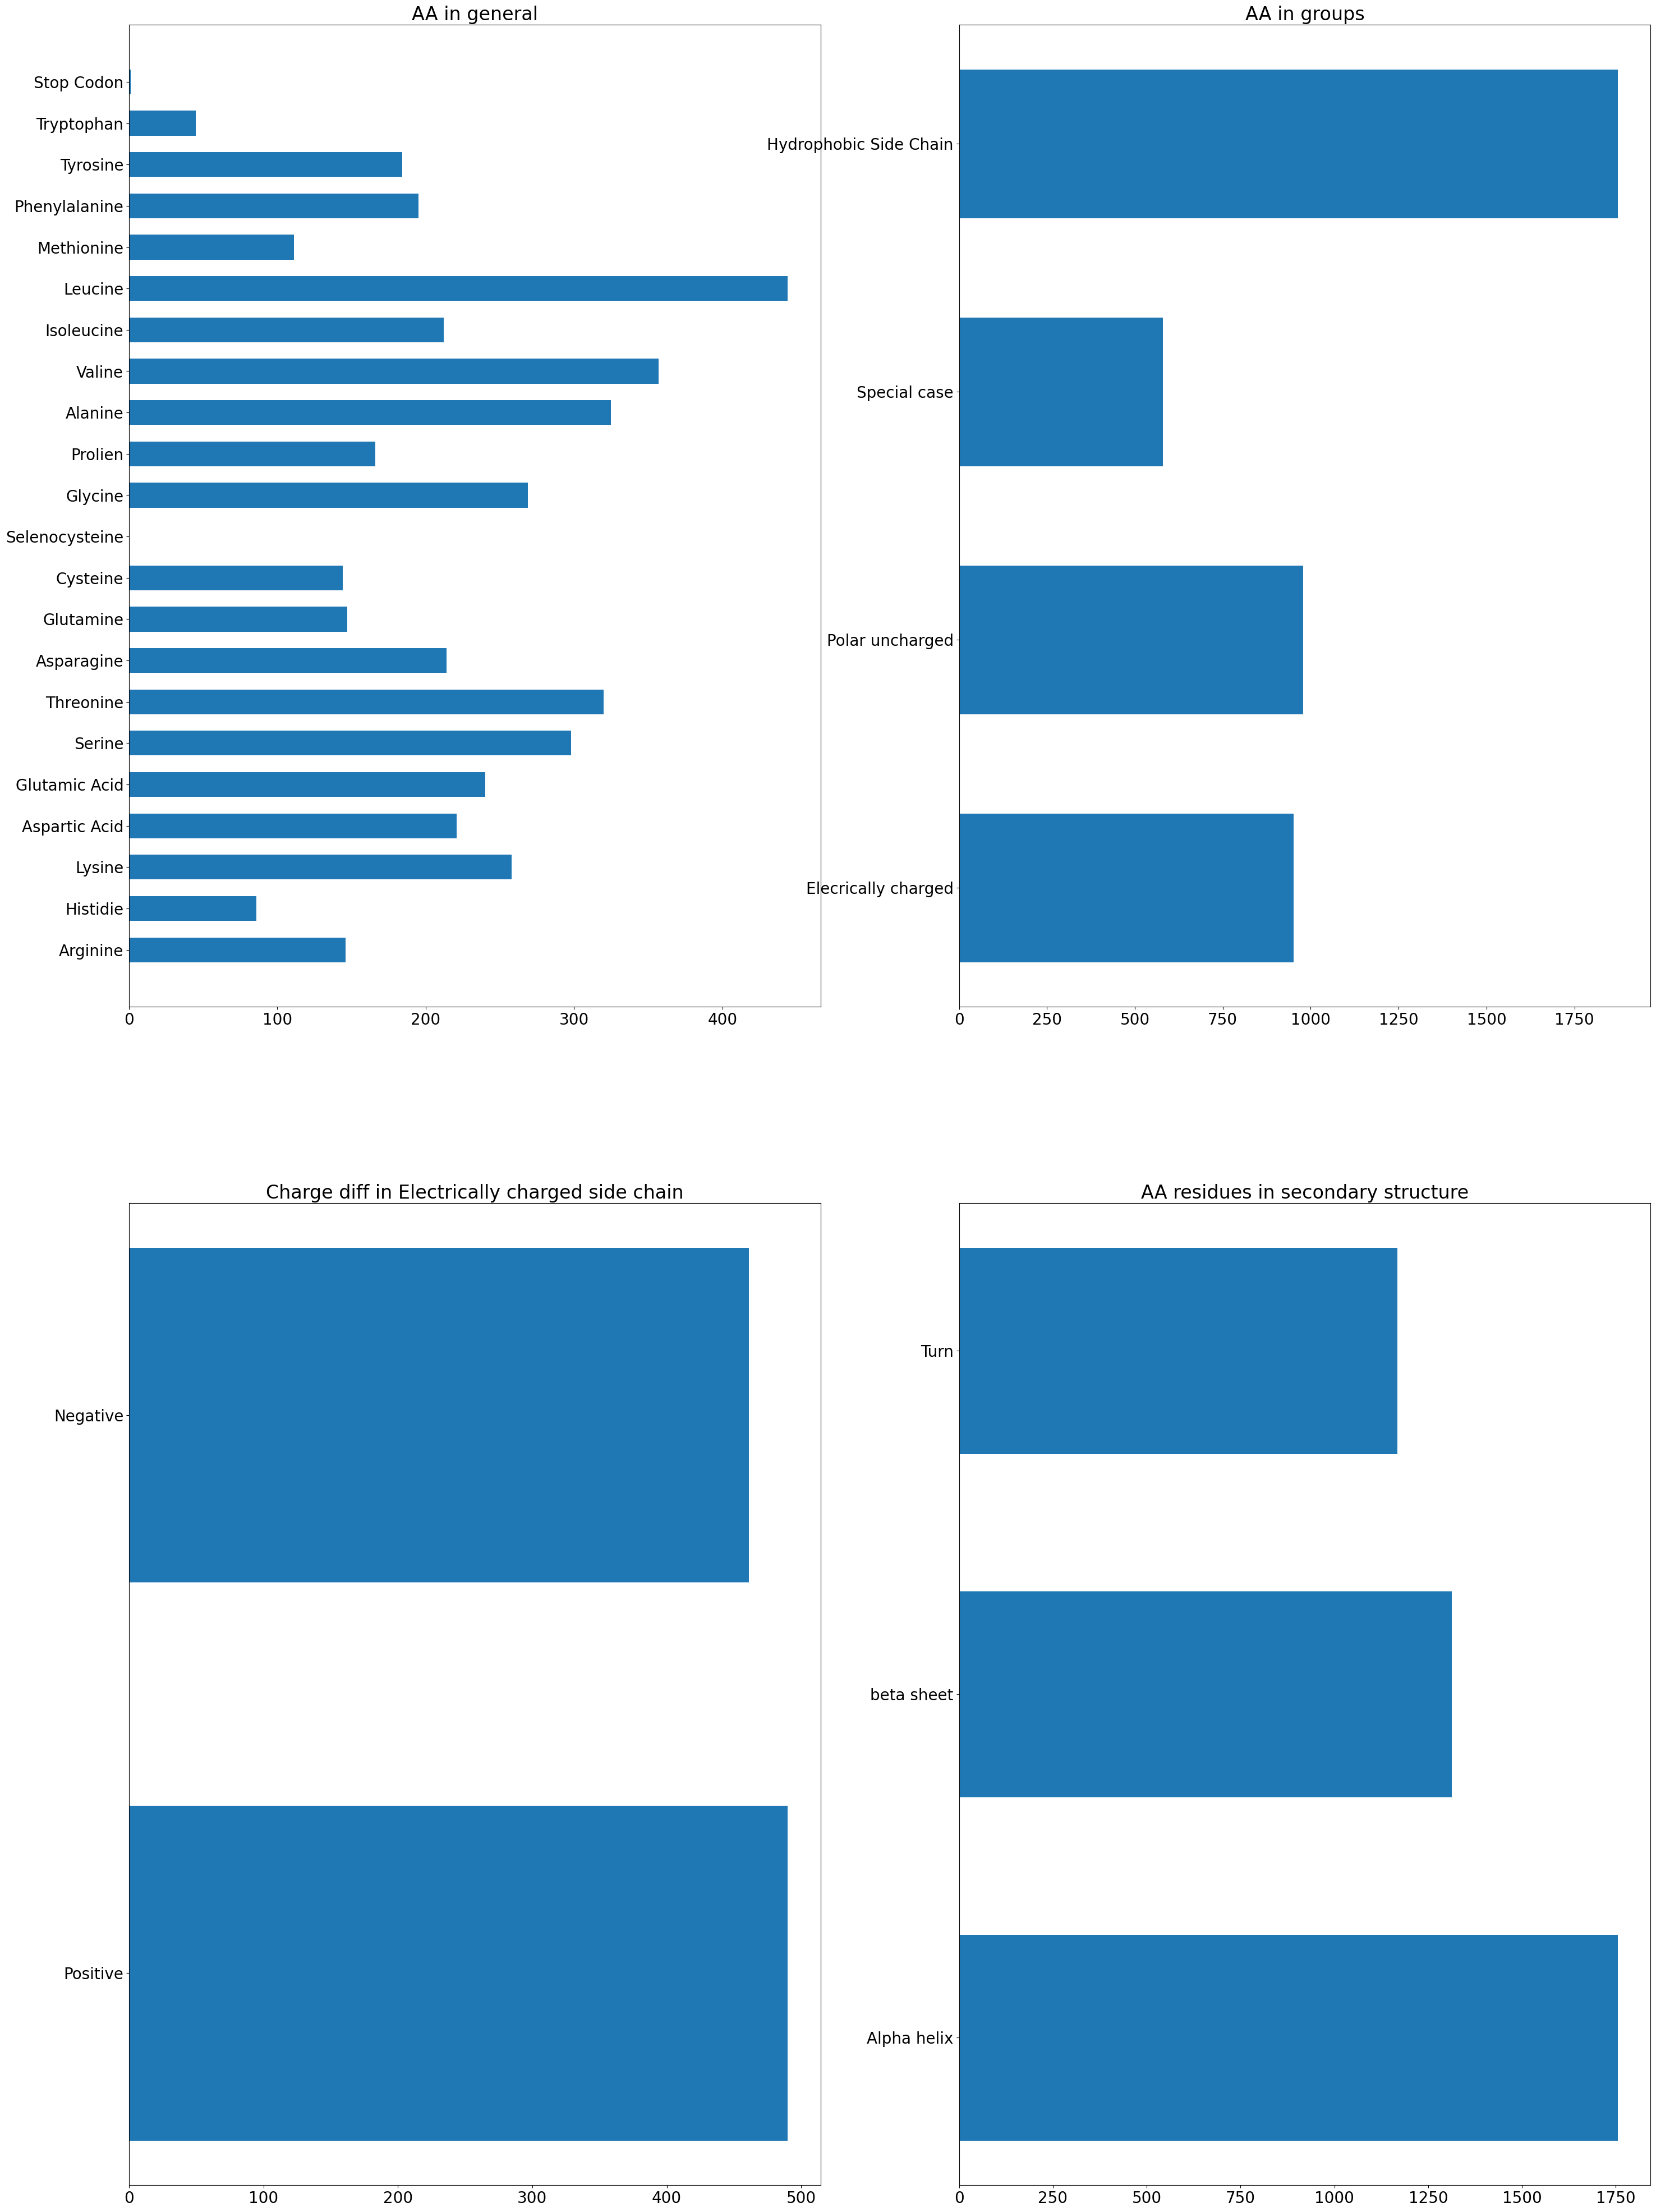

In [19]:
sort_functional_ORF = list(sorted(functional_ORF, key = len, reverse=True))
largest_FP = sort_functional_ORF[0]
print(largest_FP[0:1000])
print(len(largest_FP))
visualization(largest_FP)

MDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPTPEEPVNQFTGYLKLTDNVAIKCVDIVKEAQSANPMVIVNAANIHLKHGGGVAGALNKATNGAMQKESDDYIKLNGPLTVGGSCLLSGHNLAKK

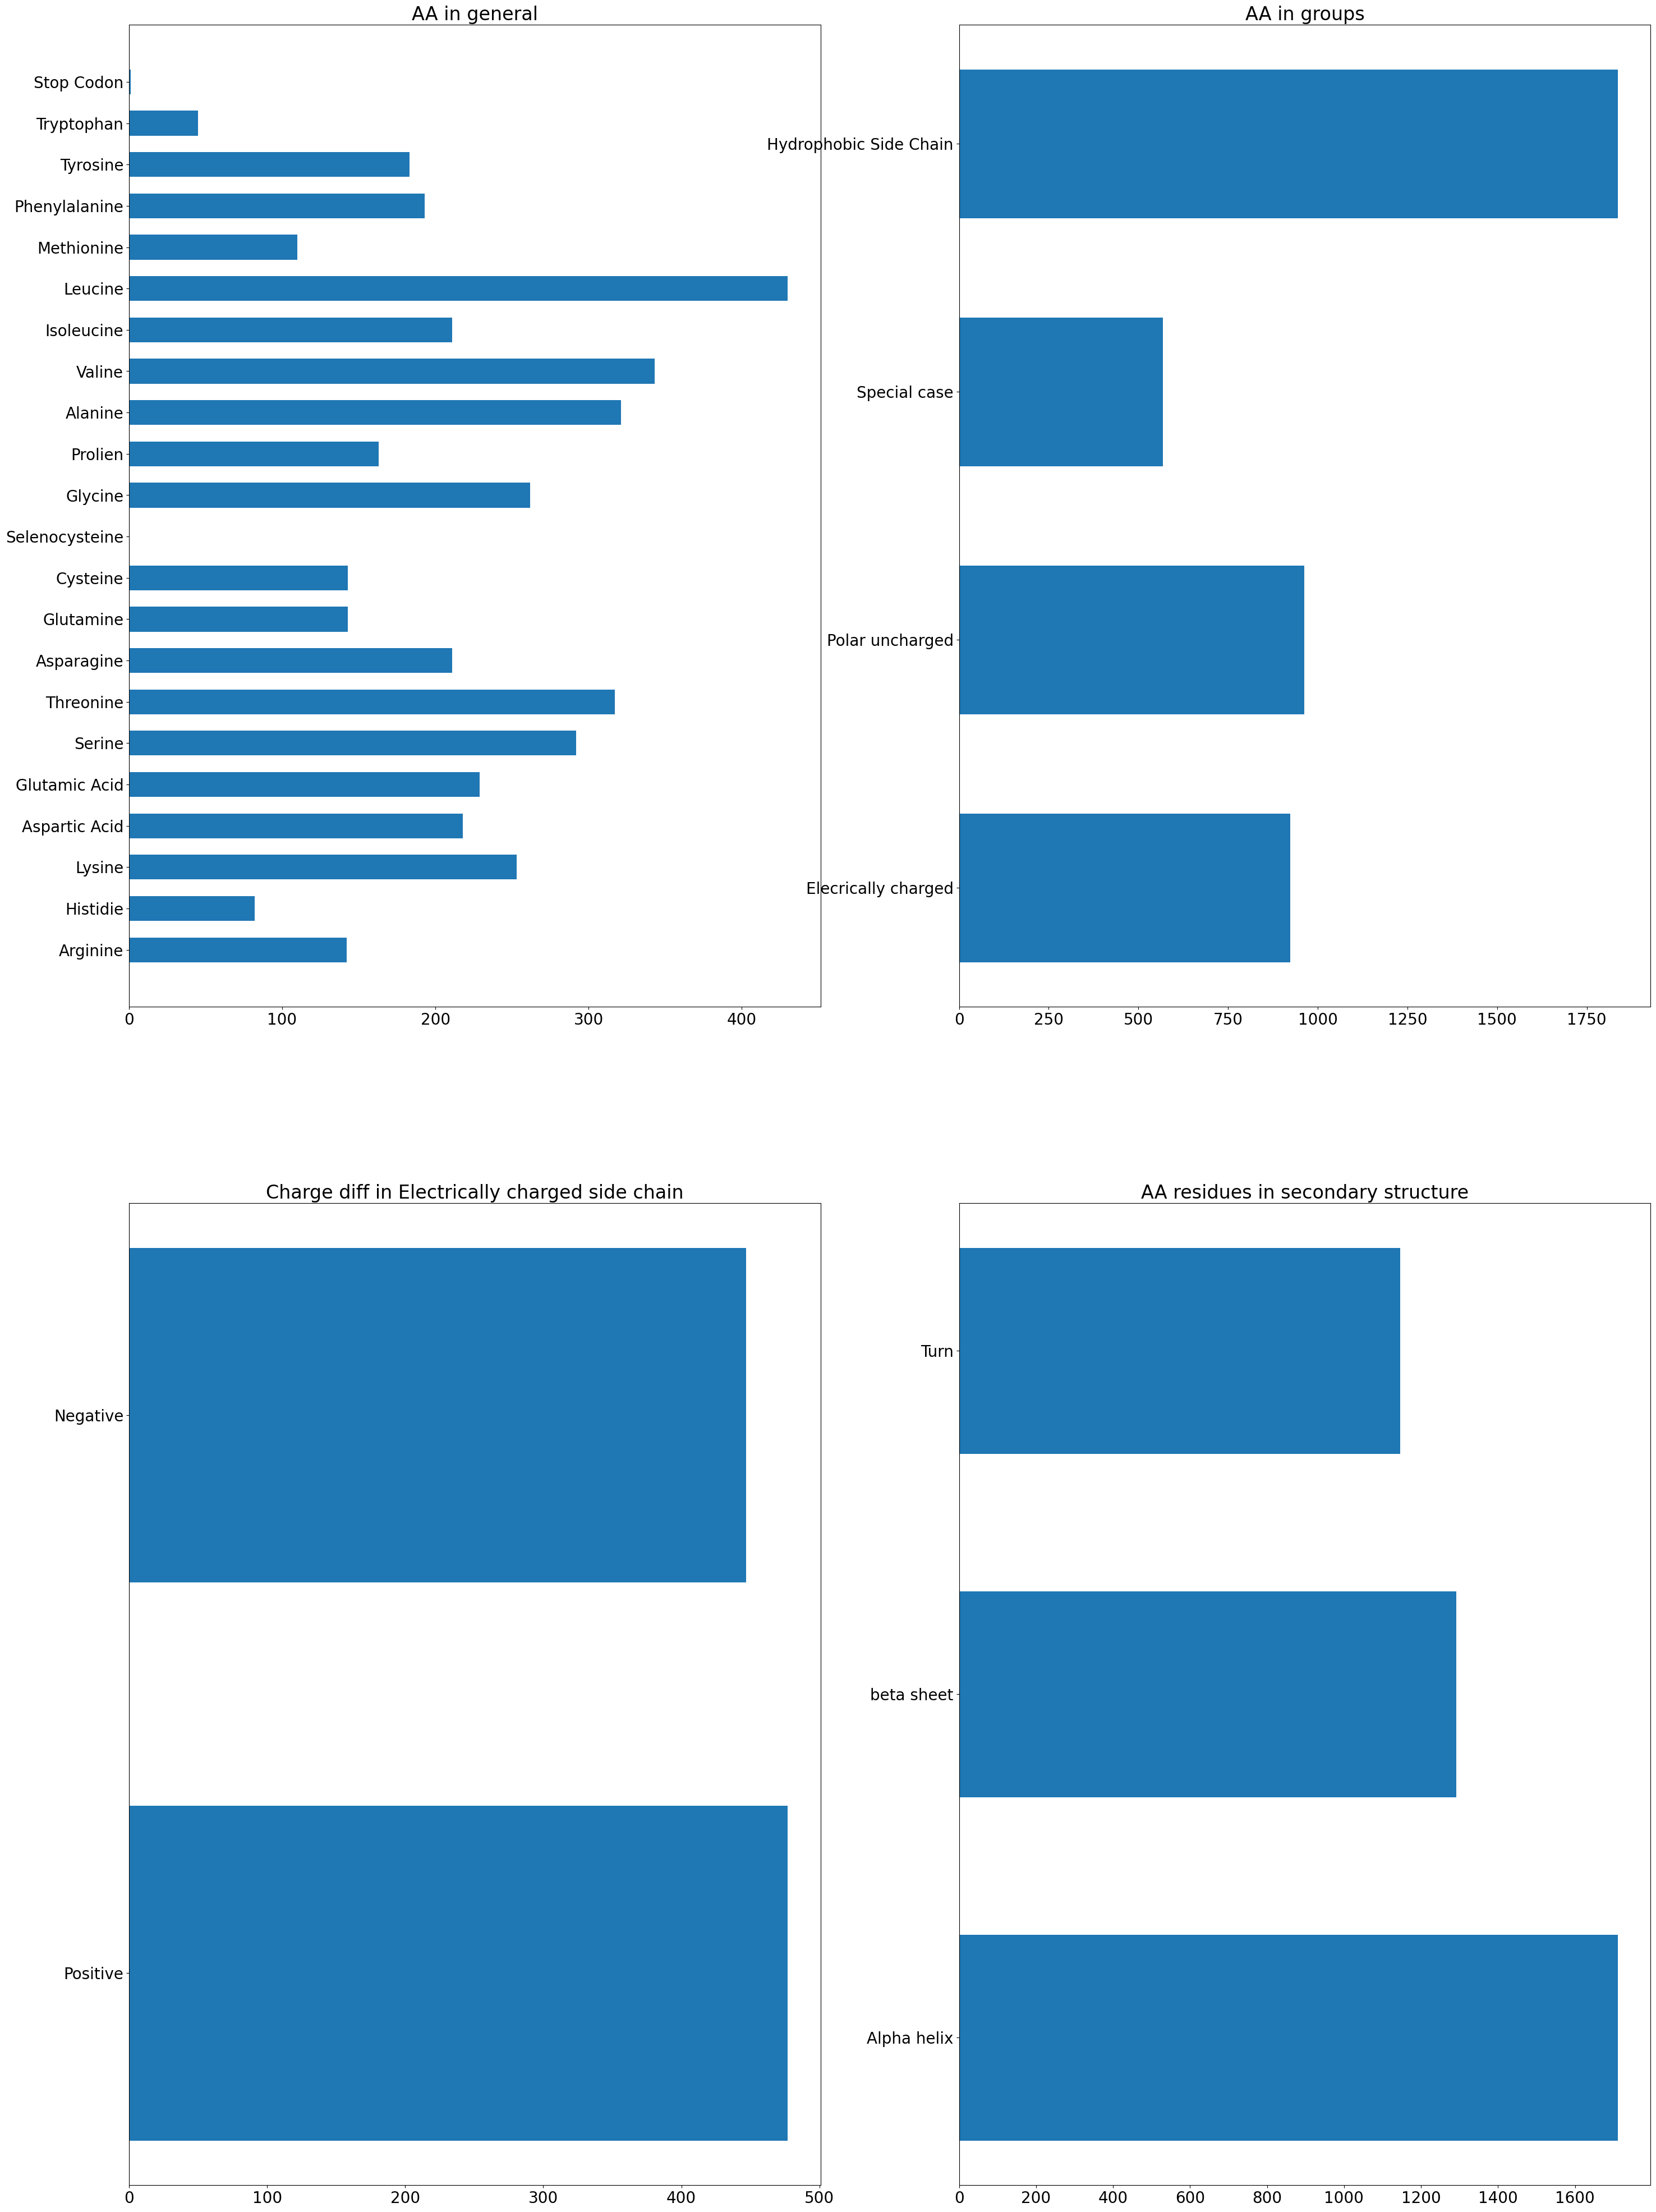

In [20]:
second_FP = sort_functional_ORF[1]
print(second_FP[0:1000])
print('protein size:',len(second_FP))
visualization(second_FP)

MCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVESGTEVTEFACVVAEAVVKTLQPVSDLLTNMGIDLDEWSVATFYLFDDAGEENFSSRMYCSFYPPDEEEEDDAECEEEEIDETCEHEYGTEDDYQGLPLEFGASAETVRVEEEEEEDWLDDTTEQSEIEPEPEPTPEEPVNQFTGYLKLTDNVAIKCVDIVKEAQSANPMVIVNAANIHLKHGGGVAGALNKATNGAMQKESDDYIKLNGPLTVGGSCLLSGHNLAKKCLHVVGPNLNAGEDIQLLKAAYENFNSQDILLAPLLSAGIFGAKPLQSLQVCVQTVRTQVYIAVNDKALYEQVVMDYLDNLKPRVEAPKQEEPPNTEDSKTEEKSVVQKPVDVKPKIKAC

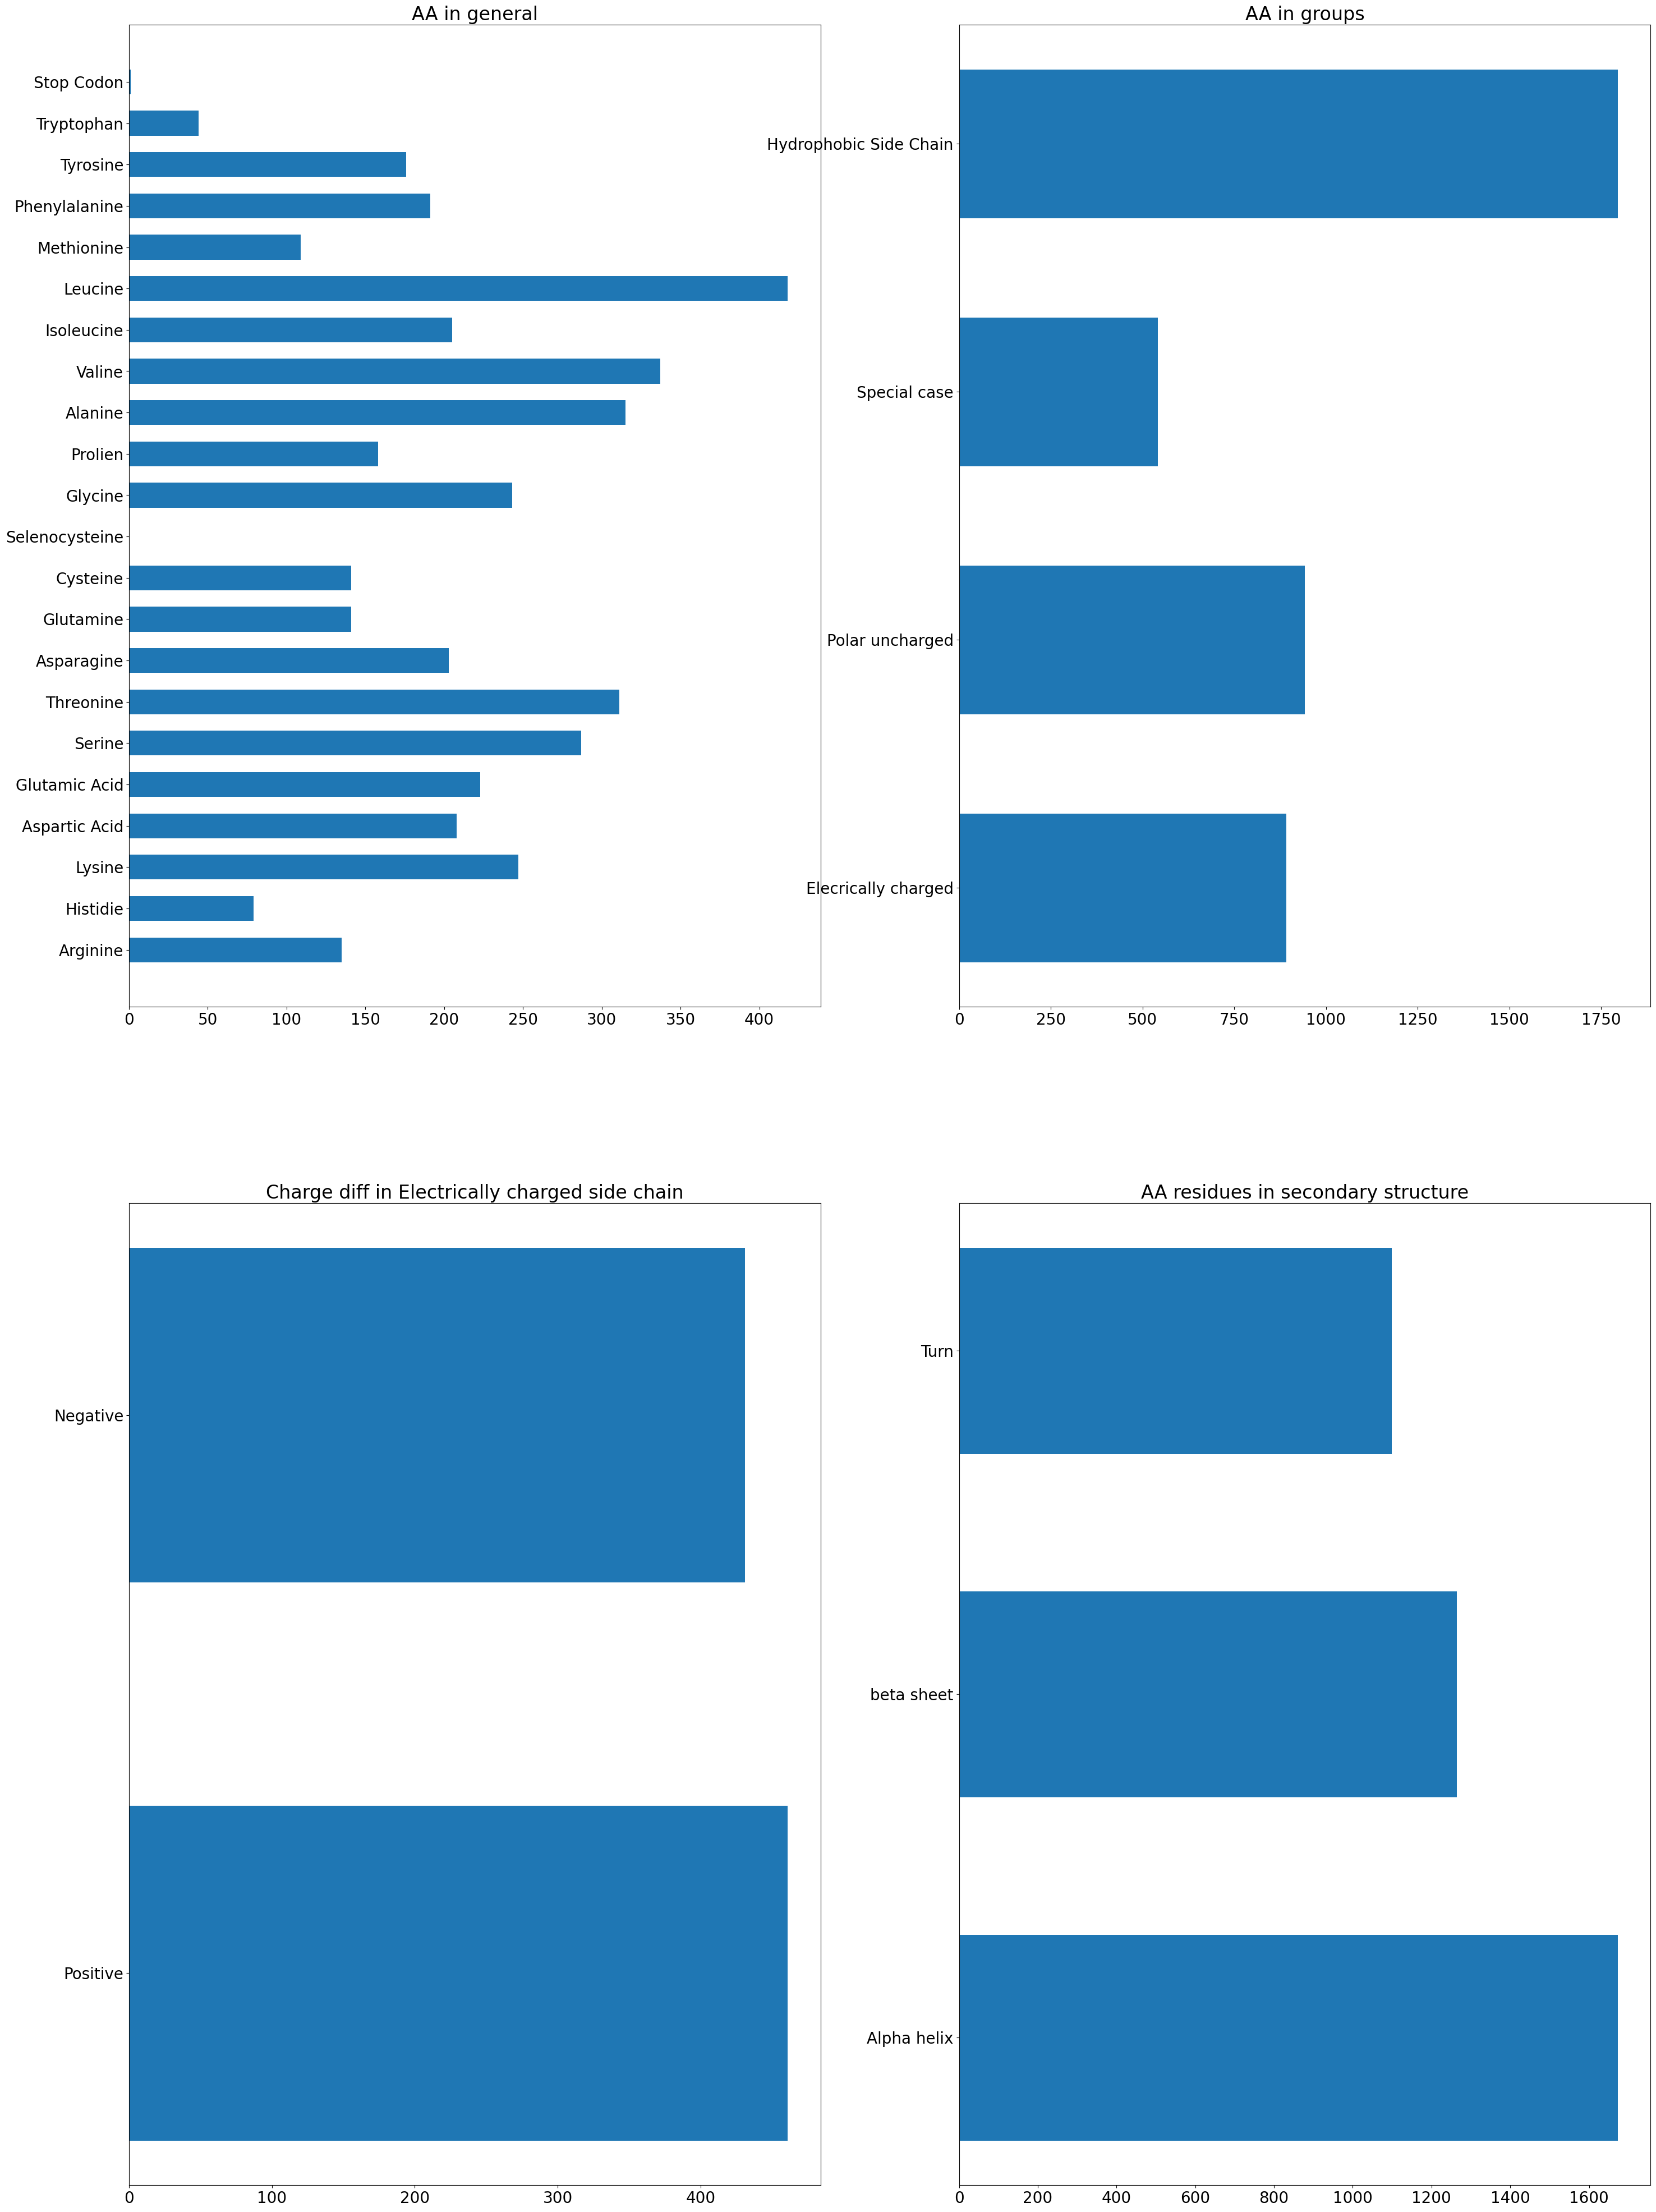

In [21]:
third_FP = sort_functional_ORF[2]
print(third_FP[0:1000])
print('protein size:',len(third_FP))
visualization(third_FP)

In [25]:
sars = open(r'D:\SARS-Genome\Coronavirus Accession (SARS, MERS, COV2)\sars.fasta')
print('HEADER:',sars.readline())
sars = sars.readlines()
sars_seq = ''
for line in sars:
    line = line.strip()
    sars_seq += line
print(sars_seq[0:1000])

HEADER: >NC_004718.3 SARS coronavirus, complete genome

ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAATTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGG

In [26]:
print('SARS-COV2',len(COVID_seq))
print('SARS-COV1', len(sars_seq))

SARS-COV2 29751
SARS-COV1 29751


In [30]:
mers = open(r'D:\SARS-Genome\Coronavirus Accession (SARS, MERS, COV2)\mers.fasta')
print('HEADER:',mers.readline())
mers = mers.readlines()
mers_seq = ''
for line in mers:
    line = line.strip()
    mers_seq += line
print(mers_seq[0:1000])

HEADER: >NC_019843.3 Middle East respiratory syndrome coronavirus, complete genome

GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGCGTATCGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCTCATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCGTCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCATGTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAACATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCATGGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTATGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTCATTGCTTGTGAAAATCCATTCATGGTTAACCAATTGGCTTATAGCTCTAGTGCAAATGGCAGCCTGGTTGGCACAACTTTGCAGGGCAAGCCTATTGGTATGTTCTTCCCTTATGACATCGAACTTGTCACAGGAAAGCAAAATATTCTCCTGCGCAAGTATGGCCGTGGTGGTTATCACTACACCCCATTCCACTATGAGCGAGACAACACCTCTTGCCCTGAGTGGATGGACGATTTTGAGGCGGATCCTAAAGGCAAATATGCCCAGAATCTGCTTAAGAAGTTGATTGGCGGTGATGTCACTCCAGTTGACCAATACATGTGTGGCGTTGATGGAAAACCCATTAGTGCCTA

In [ ]:
print('SARS-COV2',len(COVID_seq))
print('SARS-COV1', len(mers_seq))